In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline



from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.preprocessing import RobustScaler
from mlxtend.regressor import StackingCVRegressor

import sklearn.metrics as sklm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE 
from sklearn.metrics import mean_squared_log_error as msle 
from sklearn.metrics import multilabel_confusion_matrix as mcm

import numpy as np # linear algebra
from numpy import newaxis
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM, GRU
from keras.models import Sequential
from keras import regularizers
from keras import optimizers
from keras.optimizers import SGD, Adam
from keras.layers import LSTM,Dense
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from sklearn import preprocessing
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout







# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
trainData =pd.read_csv('/content/drive/My Drive/Solar Radiation/train_data.csv')
testData =pd.read_csv('/content/drive/My Drive/Solar Radiation/test_data.csv')


In [ ]:
trainData.head()

,Station,Year,Day,Month,Unix_Time,Day_length,Temp_max,Temp_min,Humidity_max,Humidity_min,Barometer,Wind_Speed,Solar_radiation
0,Bogra,2014.0,1.0,1.0,1.388534e+09,38257.0,24.0,14.0,96.0,56.0,1018.0,6.0,2.747
1,Bogra,2014.0,2.0,1.0,1.388621e+09,38280.0,25.0,13.0,95.0,46.0,1018.0,7.0,3.471
2,Bogra,2014.0,3.0,1.0,1.388707e+09,38304.0,21.0,17.0,83.0,55.0,1015.0,4.0,3.134
3,Bogra,2014.0,4.0,1.0,1.388794e+09,38331.0,23.0,14.0,88.0,54.0,1017.0,6.0,2.634
4,Bogra,2014.0,5.0,1.0,1.388880e+09,38359.0,21.0,12.0,95.0,70.0,1014.0,0.0,1.498


In [ ]:
testData.head()

,Station,Year,Day,Month,Unix_Time,Day_length,Temp_max,Temp_min,Humidity_max,Humidity_min,Barometer,Wind_Speed,Solar_radiation
0,Bogra,2019.0,1.0,6.0,1.559347e+09,48867.0,32.0,22.0,92.0,63.0,1005.0,6.0,0.175
1,Bogra,2019.0,2.0,6.0,1.559434e+09,48903.0,28.0,22.0,97.0,84.0,1009.0,4.0,0.175
2,Bogra,2019.0,3.0,6.0,1.559520e+09,48937.0,27.0,24.0,97.0,85.0,1006.0,7.0,0.674
3,Bogra,2019.0,4.0,6.0,1.559606e+09,48970.0,31.0,24.0,98.0,65.0,1005.0,4.0,0.924
4,Bogra,2019.0,5.0,6.0,1.559693e+09,49001.0,30.0,27.0,87.0,81.0,1005.0,4.0,0.175


In [ ]:
trainData.info() ## check types of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4910 entries, 0 to 4909
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Station          4908 non-null   object 
 1   Year             4908 non-null   float64
 2   Day              4908 non-null   float64
 3   Month            4908 non-null   float64
 4   Unix_Time        4908 non-null   float64
 5   Day_length       4908 non-null   float64
 6   Temp_max         4349 non-null   float64
 7   Temp_min         4349 non-null   float64
 8   Humidity_max     4349 non-null   float64
 9   Humidity_min     4344 non-null   float64
 10  Barometer        4349 non-null   float64
 11  Wind_Speed       4349 non-null   float64
 12  Solar_radiation  4889 non-null   float64
dtypes: float64(12), object(1)
memory usage: 498.8+ KB


In [ ]:
testData.info() ## check types of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Station          1470 non-null   object 
 1   Year             1470 non-null   float64
 2   Day              1470 non-null   float64
 3   Month            1470 non-null   float64
 4   Unix_Time        1470 non-null   float64
 5   Day_length       1470 non-null   float64
 6   Temp_max         1436 non-null   float64
 7   Temp_min         1436 non-null   float64
 8   Humidity_max     1436 non-null   float64
 9   Humidity_min     1436 non-null   float64
 10  Barometer        1436 non-null   float64
 11  Wind_Speed       1436 non-null   float64
 12  Solar_radiation  1440 non-null   float64
dtypes: float64(12), object(1)
memory usage: 149.6+ KB


In [ ]:
trainData = trainData[trainData['Temp_max'].notnull()]
trainData = trainData[trainData['Humidity_min'].notnull()]
trainData = trainData[trainData['Solar_radiation'].notnull()]
trainData = trainData[trainData['Wind_Speed'].notnull()]
trainData = trainData[trainData.Solar_radiation > 2]
trainData = trainData[trainData.Solar_radiation < 7]
trainData = trainData[trainData.Temp_max > 15]
trainData = trainData[trainData.Temp_max < 45]
trainData = trainData[trainData.Temp_min < 35]
trainData = trainData[trainData.Temp_min > 4]
trainData = trainData[trainData.Humidity_min > 15]
trainData = trainData[trainData.Humidity_min < 90]
trainData = trainData[trainData.Humidity_max < 101]
trainData = trainData[trainData.Wind_Speed < 35]
trainData = trainData[trainData.Wind_Speed > 0]
trainData = trainData[trainData.Barometer > 970]
trainData = trainData[trainData.Barometer < 1050]

In [ ]:
testData = testData[testData['Temp_max'].notnull()]
testData = testData[testData['Humidity_min'].notnull()]
testData = testData[testData['Solar_radiation'].notnull()]
testData = testData[testData['Wind_Speed'].notnull()]
testData = testData[testData.Solar_radiation > 2]
testData = testData[testData.Solar_radiation < 7]
testData = testData[testData.Temp_max > 15]
testData = testData[testData.Temp_max < 45]
testData = testData[testData.Temp_min < 35]
testData = testData[testData.Temp_min > 4]
testData = testData[testData.Humidity_min > 15]
testData = testData[testData.Humidity_min < 90]
testData = testData[testData.Humidity_max < 101]
testData = testData[testData.Wind_Speed < 35]
testData = testData[testData.Wind_Speed > 2]
testData = testData[testData.Barometer > 970]
testData = testData[testData.Barometer < 1050]

In [ ]:
trainData.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 4888
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Station          3027 non-null   object 
 1   Year             3027 non-null   float64
 2   Day              3027 non-null   float64
 3   Month            3027 non-null   float64
 4   Unix_Time        3027 non-null   float64
 5   Day_length       3027 non-null   float64
 6   Temp_max         3027 non-null   float64
 7   Temp_min         3027 non-null   float64
 8   Humidity_max     3027 non-null   float64
 9   Humidity_min     3027 non-null   float64
 10  Barometer        3027 non-null   float64
 11  Wind_Speed       3027 non-null   float64
 12  Solar_radiation  3027 non-null   float64
dtypes: float64(12), object(1)
memory usage: 331.1+ KB


In [ ]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970 entries, 5 to 1439
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Station          970 non-null    object 
 1   Year             970 non-null    float64
 2   Day              970 non-null    float64
 3   Month            970 non-null    float64
 4   Unix_Time        970 non-null    float64
 5   Day_length       970 non-null    float64
 6   Temp_max         970 non-null    float64
 7   Temp_min         970 non-null    float64
 8   Humidity_max     970 non-null    float64
 9   Humidity_min     970 non-null    float64
 10  Barometer        970 non-null    float64
 11  Wind_Speed       970 non-null    float64
 12  Solar_radiation  970 non-null    float64
dtypes: float64(12), object(1)
memory usage: 106.1+ KB


In [ ]:
trainData.isnull().sum() #Checking number of null values

Station            0
Year               0
Day                0
Month              0
Unix_Time          0
Day_length         0
Temp_max           0
Temp_min           0
Humidity_max       0
Humidity_min       0
Barometer          0
Wind_Speed         0
Solar_radiation    0
dtype: int64

In [ ]:
testData.isnull().sum() #Checking number of null values

Station            0
Year               0
Day                0
Month              0
Unix_Time          0
Day_length         0
Temp_max           0
Temp_min           0
Humidity_max       0
Humidity_min       0
Barometer          0
Wind_Speed         0
Solar_radiation    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


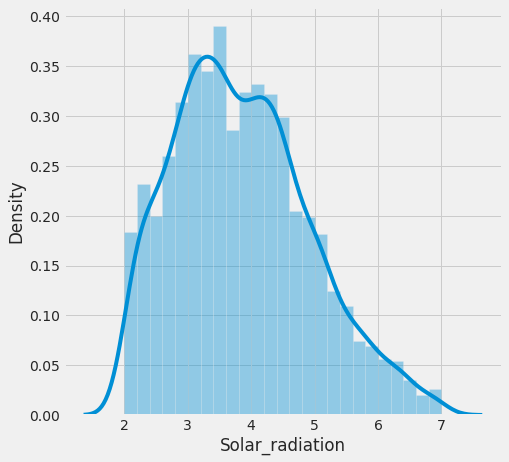

In [ ]:
plt.figure(figsize=(7, 7))
sns.distplot(trainData['Solar_radiation'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


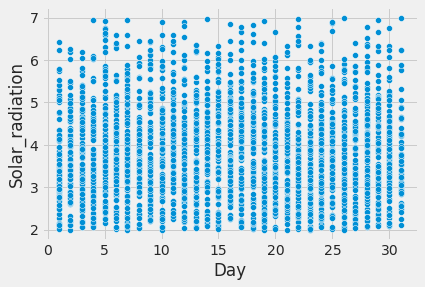

In [ ]:
sns.scatterplot('Day','Solar_radiation',data=trainData)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


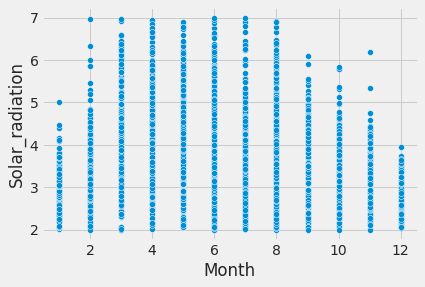

In [ ]:
sns.scatterplot('Month','Solar_radiation',data=trainData)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


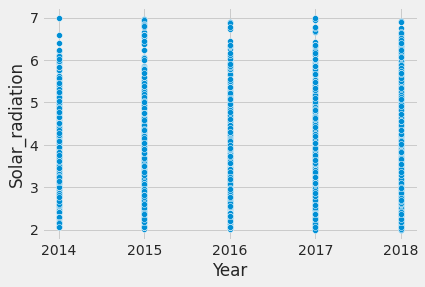

In [ ]:
sns.scatterplot('Year','Solar_radiation',data=trainData)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


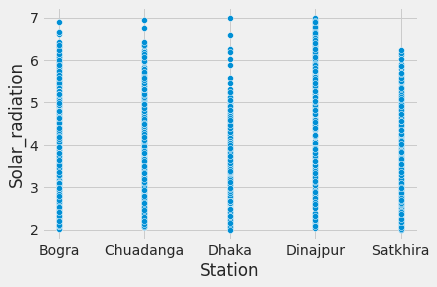

In [ ]:
sns.scatterplot('Station','Solar_radiation',data=trainData)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


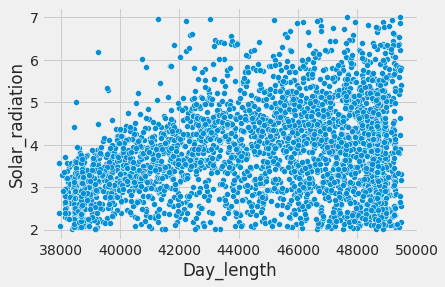

In [ ]:
sns.scatterplot('Day_length','Solar_radiation',data=trainData)

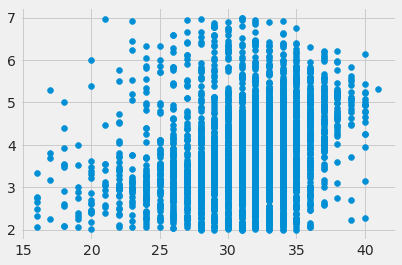

In [ ]:
plt.scatter('Temp_max','Solar_radiation',data=trainData)

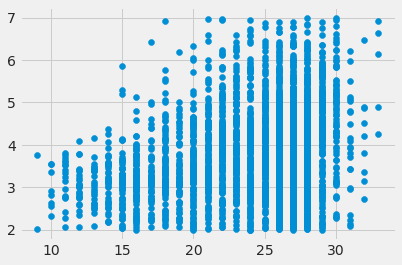

In [ ]:
plt.scatter('Temp_min','Solar_radiation',data=trainData)

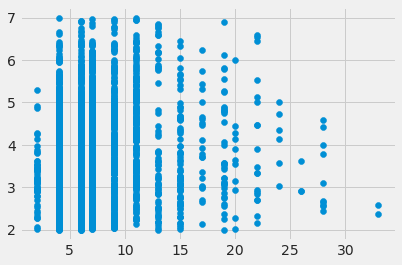

In [ ]:
plt.scatter('Wind_Speed','Solar_radiation',data=trainData)

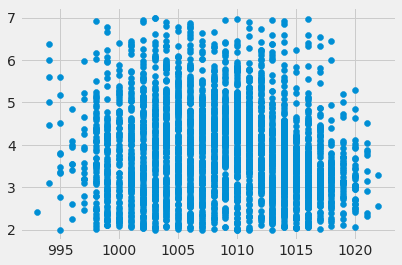

In [ ]:
plt.scatter('Barometer','Solar_radiation',data=trainData)

In [ ]:
trainData.head()

,Station,Year,Day,Month,Unix_Time,Day_length,Temp_max,Temp_min,Humidity_max,Humidity_min,Barometer,Wind_Speed,Solar_radiation
0,Bogra,2014.0,1.0,1.0,1.388534e+09,38257.0,24.0,14.0,96.0,56.0,1018.0,6.0,2.747
1,Bogra,2014.0,2.0,1.0,1.388621e+09,38280.0,25.0,13.0,95.0,46.0,1018.0,7.0,3.471
2,Bogra,2014.0,3.0,1.0,1.388707e+09,38304.0,21.0,17.0,83.0,55.0,1015.0,4.0,3.134
3,Bogra,2014.0,4.0,1.0,1.388794e+09,38331.0,23.0,14.0,88.0,54.0,1017.0,6.0,2.634
11,Bogra,2014.0,12.0,1.0,1.389485e+09,38610.0,24.0,15.0,86.0,47.0,1020.0,4.0,2.971


In [ ]:
trainData['Station'] = trainData['Station'].map({'Bogra':1, 'Chuadanga':2, 'Dhaka':3, 'Dinajpur':4, 'Satkhira':5})

In [ ]:
testData['Station'] = testData['Station'].map({'Bogra':1, 'Chuadanga':2, 'Dhaka':3, 'Dinajpur':4, 'Satkhira':5})

In [ ]:
trainData.head()

,Station,Year,Day,Month,Unix_Time,Day_length,Temp_max,Temp_min,Humidity_max,Humidity_min,Barometer,Wind_Speed,Solar_radiation
0,1,2014.0,1.0,1.0,1.388534e+09,38257.0,24.0,14.0,96.0,56.0,1018.0,6.0,2.747
1,1,2014.0,2.0,1.0,1.388621e+09,38280.0,25.0,13.0,95.0,46.0,1018.0,7.0,3.471
2,1,2014.0,3.0,1.0,1.388707e+09,38304.0,21.0,17.0,83.0,55.0,1015.0,4.0,3.134
3,1,2014.0,4.0,1.0,1.388794e+09,38331.0,23.0,14.0,88.0,54.0,1017.0,6.0,2.634
11,1,2014.0,12.0,1.0,1.389485e+09,38610.0,24.0,15.0,86.0,47.0,1020.0,4.0,2.971


In [ ]:
testData.head()

,Station,Year,Day,Month,Unix_Time,Day_length,Temp_max,Temp_min,Humidity_max,Humidity_min,Barometer,Wind_Speed,Solar_radiation
5,1,2019.0,6.0,6.0,1.559779e+09,49031.0,33.0,26.0,94.0,67.0,1006.0,7.0,3.858
6,1,2019.0,7.0,6.0,1.559866e+09,49058.0,34.0,27.0,96.0,56.0,1006.0,4.0,3.845
7,1,2019.0,8.0,6.0,1.559952e+09,49084.0,34.0,27.0,90.0,61.0,1006.0,4.0,4.282
8,1,2019.0,9.0,6.0,1.560038e+09,49108.0,30.0,27.0,89.0,79.0,1004.0,4.0,3.134
9,1,2019.0,10.0,6.0,1.560125e+09,49130.0,35.0,31.0,81.0,57.0,1002.0,7.0,3.558


In [ ]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 4888
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Station          3027 non-null   int64  
 1   Year             3027 non-null   float64
 2   Day              3027 non-null   float64
 3   Month            3027 non-null   float64
 4   Unix_Time        3027 non-null   float64
 5   Day_length       3027 non-null   float64
 6   Temp_max         3027 non-null   float64
 7   Temp_min         3027 non-null   float64
 8   Humidity_max     3027 non-null   float64
 9   Humidity_min     3027 non-null   float64
 10  Barometer        3027 non-null   float64
 11  Wind_Speed       3027 non-null   float64
 12  Solar_radiation  3027 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 331.1 KB


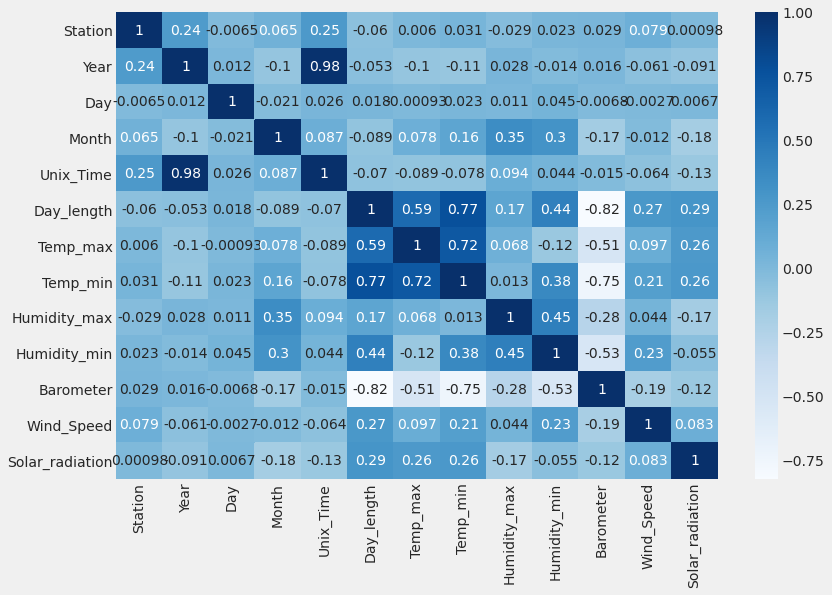

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(trainData.corr(),annot=True,cmap='Blues')

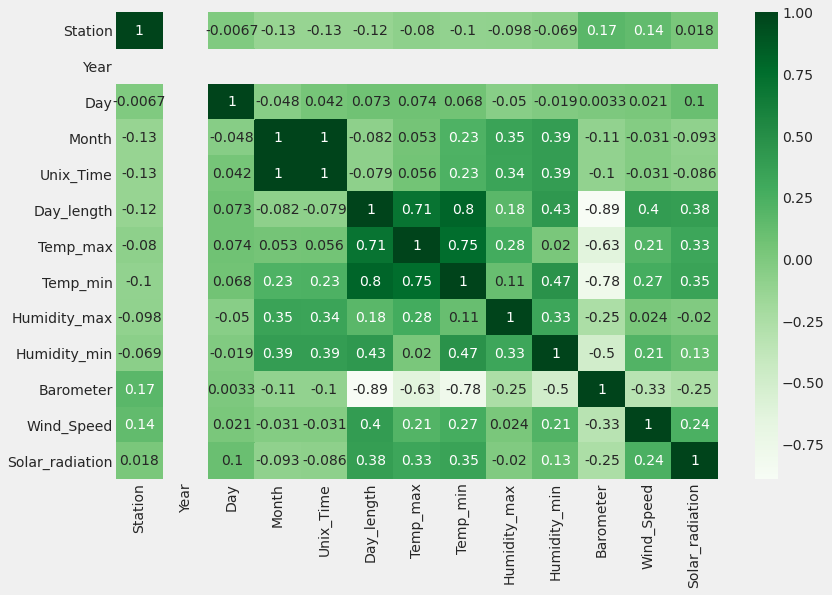

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(testData.corr(),annot=True,cmap='Greens')

In [ ]:
#sns.pairplot(trainData)

In [ ]:
#sns.pairplot(testData)

In [ ]:
X_train= trainData.drop( ['Solar_radiation','Year'],axis =1)

In [ ]:
y_train= trainData['Solar_radiation']

In [ ]:
X_test= testData.drop( ['Solar_radiation','Year'],axis =1)
y_test= testData['Solar_radiation']

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow.compat.v2 as tf

import abc
import types

import numpy as np
import six
from tensorflow.python.eager import def_function
from keras import activations
from keras import backend as K
from keras.engine import base_layer


from keras.losses import binary_crossentropy
from keras.losses import categorical_crossentropy
from keras.losses import categorical_hinge
from keras.losses import hinge
from keras.losses import kullback_leibler_divergence
from keras.losses import logcosh
from keras.losses import mean_absolute_error
from keras.losses import mean_absolute_percentage_error as mape
from keras.losses import mean_squared_error
from keras.losses import mean_squared_logarithmic_error as msle
from keras.losses import poisson
from keras.losses import sparse_categorical_crossentropy
from keras.losses import squared_hinge



In [ ]:
model = Sequential()
    
model.add(Dense(128, activation='relu', input_dim=11))
model.add(Dropout(0.1))
    
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1, activation='linear'))

model.compile(metrics=['mape','mae', 'msle', 'logcosh', 'poisson'], loss='mse', optimizer=Adam(learning_rate= 0.001))
history = model.fit(X_train, y_train, epochs=100, batch_size=1)

Epoch 1/100
3027/3027 [==============================] - 5s 1ms/step - loss: 1.5294 - mape: 26.2854 - mae: 0.9579 - msle: 0.0738 - logcosh: 0.5052 - poisson: nan
Epoch 2/100
3027/3027 [==============================] - 4s 1ms/step - loss: 1.1079 - mape: 22.8189 - mae: 0.8197 - msle: 0.0472 - logcosh: 0.3975 - poisson: -1.3417
Epoch 3/100
3027/3027 [==============================] - 4s 1ms/step - loss: 1.0003 - mape: 21.7759 - mae: 0.7782 - msle: 0.0427 - logcosh: 0.3659 - poisson: -1.3557
Epoch 4/100
3027/3027 [==============================] - 4s 1ms/step - loss: 0.9409 - mape: 21.0221 - mae: 0.7520 - msle: 0.0398 - logcosh: 0.3476 - poisson: -1.3645
Epoch 5/100
3027/3027 [==============================] - 4s 1ms/step - loss: 0.9296 - mape: 21.0958 - mae: 0.7477 - msle: 0.0397 - logcosh: 0.3449 - poisson: -1.3655
Epoch 6/100
3027/3027 [==============================] - 4s 1ms/step - loss: 0.9059 - mape: 20.8750 - mae: 0.7441 - msle: 0.0386 - logcosh: 0.3397 - poisson: -1.3685
Epoch 7/

95/95 [==============================] - 0s 1ms/step - loss: 0.3428 - mape: 12.8639 - mae: 0.4449 - msle: 0.0159 - logcosh: 0.1459 - poisson: -1.4391
Mean absolute error: 0.3428102433681488. Mean squared error: 12.863938331604004.


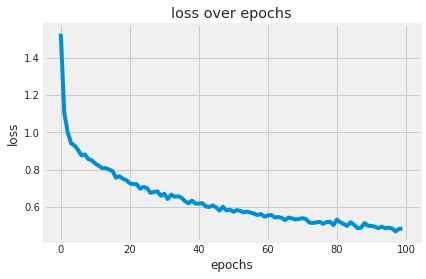

/n


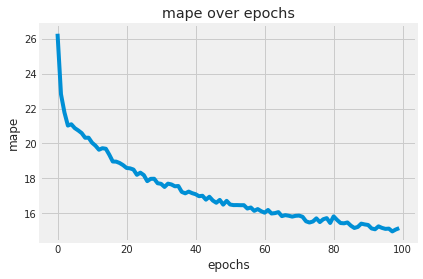

/n


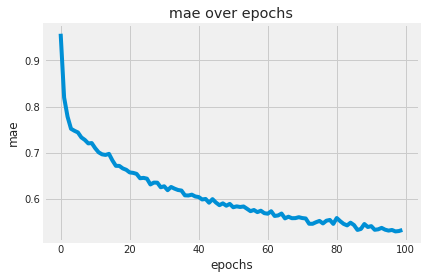

/n


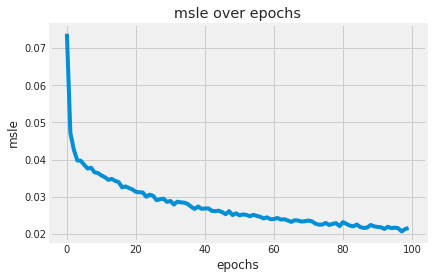

/n


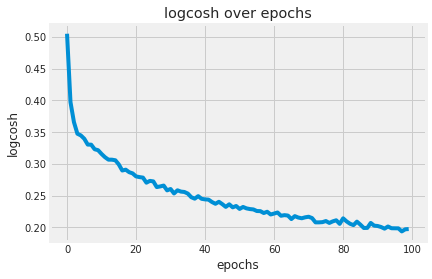

/n


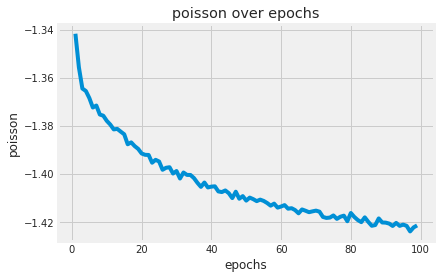

/n


In [ ]:

fit = history.history
scores = model.evaluate(X_train, y_train)
mae = scores[0]
mse = scores[1]
print('Mean absolute error: ' + str(mae) + '. Mean squared error: ' + str(mse) + '.')

for i in fit:
    plt.plot(fit[i])
    plt.title(i + ' over epochs')
    plt.ylabel(i)
    plt.xlabel('epochs')
    plt.show()
    print('/n')

In [ ]:
pred_Dense = model.predict(X_test)

In [ ]:
MSE(y_test, pred_Dense)

1.222723545696496

In [ ]:
from sklearn.metrics import mean_absolute_error as MAE 

In [ ]:
MAE(y_test, pred_Dense)

0.8473854567879745

In [ ]:
 
 
# RMSE Computation 
rmse = np.sqrt(MSE(y_test, pred_Dense)) 
print("RMSE : % f" %(rmse)) 

RMSE :  1.105768


In [ ]:
r2_score(y_test, pred_Dense)

-0.005054183445695637

In [ ]:
msle(y_test, pred_Dense)

<tf.Tensor: shape=(970,), dtype=float32, numpy=
array([0.05315255, 0.06022843, 0.05239851, 0.06108093, 0.12533474,
       0.12752372, 0.06407775, 0.05326708, 0.11957463, 0.05297034,
       0.05082315, 0.0816465 , 0.05799638, 0.07468933, 0.05092446,
       0.0508913 , 0.05114892, 0.05892103, 0.06497641, 0.07932203,
       0.05595567, 0.12311139, 0.13697723, 0.06838989, 0.05815936,
       0.06454409, 0.0626682 , 0.07046963, 0.06445935, 0.06945498,
       0.05141444, 0.05082833, 0.05486798, 0.05361001, 0.05238049,
       0.06747862, 0.07509231, 0.1115533 , 0.1490147 , 0.06596421,
       0.09308591, 0.11029234, 0.08357248, 0.08127555, 0.08069208,
       0.12016734, 0.1074629 , 0.12225378, 0.07825359, 0.06354184,
       0.09212837, 0.05854708, 0.10831594, 0.08626024, 0.0804678 ,
       0.0665409 , 0.0574626 , 0.05248466, 0.13216722, 0.13787788,
       0.05554955, 0.07920727, 0.08861016, 0.11700165, 0.05076136,
       0.06802948, 0.05699499, 0.06015701, 0.05811604, 0.05073723,
       0.05160

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mean_absolute_percentage_error(y_test, pred_Dense)

32.080995148561485

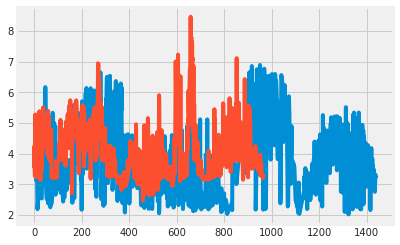

In [ ]:


plt.plot(y_test)
plt.plot(pred_Dense)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Unrecognized location 'higher right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  after removing the cwd from sys.path.


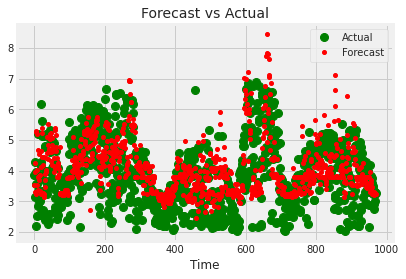

In [ ]:
plt.title("Forecast vs Actual", fontsize=14)
plt.plot(pd.Series(np.ravel(y_test)), "bo", markersize=8, label="Actual", color='green')
plt.plot(pd.Series(np.ravel(pred_Dense)), "r.", markersize=8, label="Forecast", color='red')
plt.legend(loc="higher right")
plt.xlabel("Time")

plt.show()

In [ ]:
X_train_LSTM = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_LSTM = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (X_train_LSTM.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))

model.add(Dense(16))
model.add(Dense(1))

# Compile the model


model.compile(metrics=['mape','mae', 'msle', 'logcosh', 'poisson'], loss='mse', optimizer=Adam(learning_rate=0.001))
#Train the model
#model.fit(X_train, y_train, batch_size=1, epochs=1)
history = model.fit(X_train_LSTM, y_train, epochs=150, batch_size=1)

Epoch 1/150
3027/3027 [==============================] - 24s 7ms/step - loss: 1.2234 - mape: 24.8744 - mae: 0.8781 - msle: 0.0577 - logcosh: 0.4377 - poisson: nan
Epoch 2/150
3027/3027 [==============================] - 20s 6ms/step - loss: 1.0236 - mape: 22.7365 - mae: 0.8016 - msle: 0.0436 - logcosh: 0.3795 - poisson: -1.3535
Epoch 3/150
3027/3027 [==============================] - 20s 7ms/step - loss: 1.0017 - mape: 22.3539 - mae: 0.7884 - msle: 0.0426 - logcosh: 0.3721 - poisson: -1.3566
Epoch 4/150
3027/3027 [==============================] - 20s 6ms/step - loss: 0.9811 - mape: 22.0776 - mae: 0.7792 - msle: 0.0417 - logcosh: 0.3649 - poisson: -1.3592
Epoch 5/150
3027/3027 [==============================] - 20s 7ms/step - loss: 0.9522 - mape: 21.7997 - mae: 0.7687 - msle: 0.0406 - logcosh: 0.3568 - poisson: -1.3632
Epoch 6/150
3027/3027 [==============================] - 20s 7ms/step - loss: 0.9321 - mape: 21.4798 - mae: 0.7568 - msle: 0.0399 - logcosh: 0.3489 - poisson: -1.3654
Ep

MAE: 0.3428102433681488 MSE: 12.863938331604004
95/95 [==============================] - 2s 6ms/step - loss: 0.0226 - mape: 2.6992 - mae: 0.0989 - msle: 9.8975e-04 - logcosh: 0.0104 - poisson: -1.4818
Mean absolute error: 0.022555207833647728. Mean squared error: 2.699169874191284.


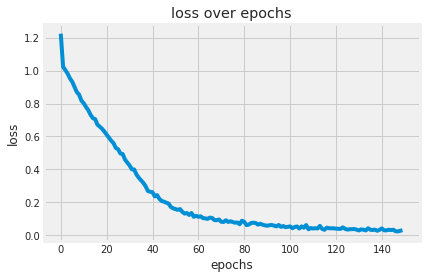

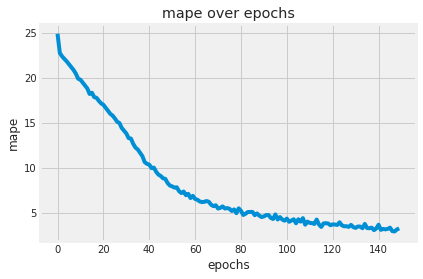

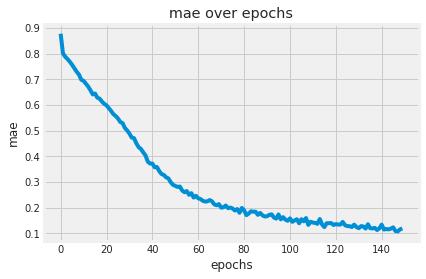

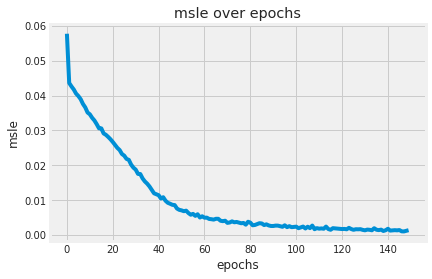

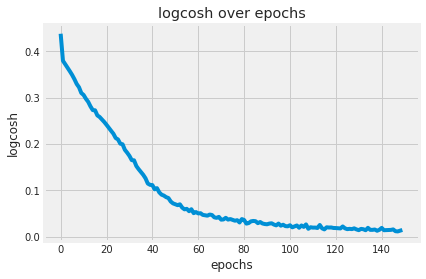

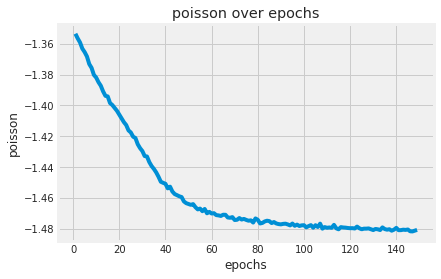

In [ ]:
print('MAE: '+ str(mae) + ' MSE: '+ str(mse))
fit = history.history
scores = model.evaluate(X_train_LSTM, y_train)
mae = scores[0]
mse = scores[1]
print('Mean absolute error: ' + str(mae) + '. Mean squared error: ' + str(mse) + '.')

for i in fit:
    plt.plot(fit[i])
    plt.title(i + ' over epochs')
    plt.ylabel(i)
    plt.xlabel('epochs')
    plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
pred_LSTM = model.predict(X_test_LSTM) 

NameError: ignored

In [ ]:
MSE(y_test, pred_LSTM)

1.2812453140202806

In [ ]:
MAE((y_test), pred_LSTM)

0.8595505997360858

In [ ]:

from sklearn.metrics import mean_squared_error as MSE  
# RMSE Computation 
rmse = np.sqrt(MSE(y_test, pred_LSTM)) 
print("RMSE : % f" %(rmse)) 

RMSE :  1.131921


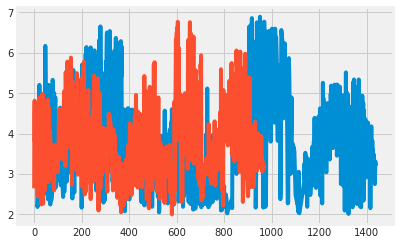

In [ ]:
trainPredict = model.predict(X_train_LSTM)

plt.plot(y_test)
plt.plot(pred_LSTM)
plt.show()

In [ ]:
r2_score(y_test, pred_LSTM)

-0.05315790098959505

In [ ]:
msle(y_test, pred_LSTM)

<tf.Tensor: shape=(970,), dtype=float32, numpy=
array([0.12130675, 0.06819262, 0.09100941, 0.05079155, 0.06910249,
       0.06536842, 0.05311858, 0.05432991, 0.05073475, 0.05854664,
       0.06741079, 0.08627287, 0.05619106, 0.06449752, 0.05325964,
       0.15447788, 0.08789488, 0.08744562, 0.12027897, 0.05110911,
       0.05072784, 0.06362236, 0.0964939 , 0.09518944, 0.07983432,
       0.12767313, 0.1368434 , 0.1094625 , 0.05111437, 0.05089523,
       0.05446912, 0.1961583 , 0.10548822, 0.08154625, 0.05116599,
       0.1031322 , 0.06087184, 0.15786168, 0.19132505, 0.09968405,
       0.05081389, 0.0545092 , 0.05096179, 0.05658939, 0.12930024,
       0.05077665, 0.07968474, 0.0663137 , 0.06367501, 0.06055677,
       0.05506843, 0.0525608 , 0.08352102, 0.06482316, 0.09249893,
       0.07695599, 0.09061819, 0.08032659, 0.09307089, 0.05573992,
       0.1011306 , 0.05897736, 0.07988259, 0.07397384, 0.09680122,
       0.05304767, 0.05165846, 0.05461745, 0.05087098, 0.05605499,
       0.05072

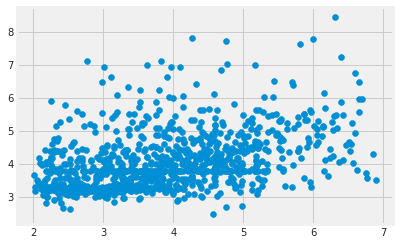

In [ ]:
plt.scatter(y_test, pred_Dense);


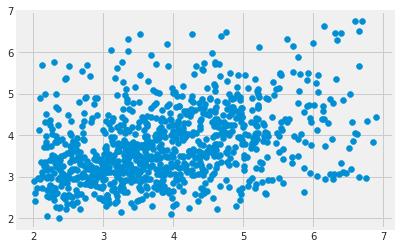

In [ ]:
plt.scatter(y_test, pred_LSTM);


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
 mean_absolute_percentage_error(y_test, pred_LSTM)

30.805270675020235

In [ ]:
r2_score(y_test, pred_LSTM)

-0.05315790098959505

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Unrecognized location 'higher right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  after removing the cwd from sys.path.


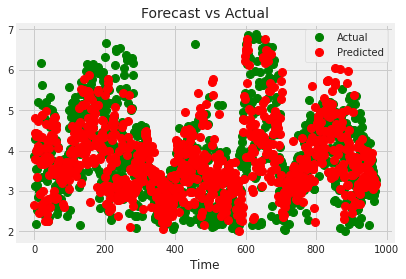

In [ ]:
plt.title("Forecast vs Actual", fontsize=14)
plt.plot(pd.Series(np.ravel(y_test)), "bo", markersize=8, label="Actual", color='green')
plt.plot(pd.Series(np.ravel(pred_LSTM)), "bo", markersize=8, label="Predicted", color='red')
plt.legend(loc="higher right")
plt.xlabel("Time")

plt.show()

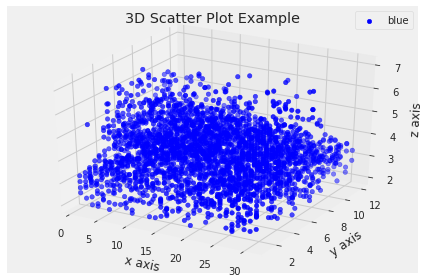

In [ ]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x1 = trainData.Day
y1 = trainData.Month
z1 = trainData.Solar_radiation

ax.scatter(x1, y1, z1, c='b', marker='o', label='blue')


ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Scatter Plot Example")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
params = {'n_estimators': 400,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [ ]:
from sklearn import datasets, ensemble

In [ ]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

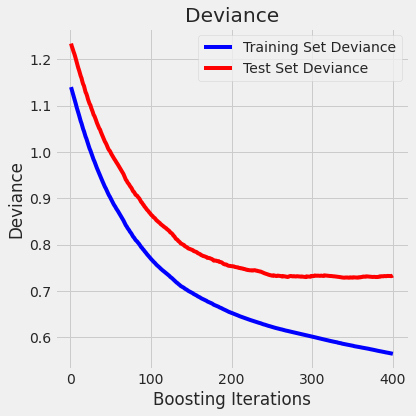

In [ ]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, pred_Dense in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, pred_Dense)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

In [ ]:

train = np.array(list(zip(X_train, y_train)))
test = np.array(list(zip(X_test, y_test)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
def create_dataset(n_X, look_back):
   dataX, dataY = [], []
   for i in range(len(n_X)-look_back):
      a = n_X[i:(i+look_back), ]
      dataX.append(a)
      dataY.append(n_X[i + look_back, ])
   return np.array(dataX), np.array(dataY)

In [ ]:
look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)
X_train = np.reshape(X_train, (X_train.shape[0], 1, 2))
X_test = np.reshape(X_test, (X_test.shape[0], 1, 2))

In [ ]:
X_train_GRU = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_GRU = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

model = Sequential()

model.add(GRU(128, return_sequences=True, input_shape=(X_train_GRU.shape[1],1), activation='tanh'))
model.add(Dropout(0.2))

model.add(GRU(64, return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))

model.add(GRU(32, activation='tanh'))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(metrics=['mape','mae', 'msle', 'logcosh', 'poisson'], loss='mse', optimizer=Adam(learning_rate=0.001))

history = model.fit(X_train_GRU, y_train, epochs=100, batch_size=1)

Epoch 1/100
3027/3027 [==============================] - 111s 27ms/step - loss: 1.4241 - mape: 26.3146 - mae: 0.9420 - msle: 0.0686 - logcosh: 0.4879 - poisson: nan
Epoch 2/100
3027/3027 [==============================] - 83s 28ms/step - loss: 1.1953 - mape: 24.3443 - mae: 0.8661 - msle: 0.0514 - logcosh: 0.4290 - poisson: nan
Epoch 3/100
3027/3027 [==============================] - 83s 27ms/step - loss: 1.1269 - mape: 23.5260 - mae: 0.8377 - msle: 0.0479 - logcosh: 0.4090 - poisson: -1.3393
Epoch 4/100
3027/3027 [==============================] - 83s 28ms/step - loss: 1.1095 - mape: 23.3599 - mae: 0.8331 - msle: 0.0473 - logcosh: 0.4046 - poisson: -1.3414
Epoch 5/100
3027/3027 [==============================] - 83s 27ms/step - loss: 1.0865 - mape: 22.9456 - mae: 0.8187 - msle: 0.0469 - logcosh: 0.3918 - poisson: nan
Epoch 6/100
3027/3027 [==============================] - 83s 27ms/step - loss: 1.0168 - mape: 22.5353 - mae: 0.8010 - msle: 0.0434 - logcosh: 0.3772 - poisson: -1.3540
Epo

In [ ]:
pred_GRU = model.predict(X_test_GRU) 

In [ ]:
model.load_weights('LSTMBasic2.h5')
pred_LSTM2 = model.predict(X_test)

In [ ]:
MSE(y_test, pred_GRU)


0.9793434948549288

In [ ]:
MAE((y_test), pred_GRU)


0.7785929181234615

In [ ]:
from sklearn.metrics import mean_squared_error as MSE  
# RMSE Computation 
rmse = np.sqrt(MSE(y_test, pred_GRU)) 
print("RMSE : % f" %(rmse)) 

RMSE :  0.989618


In [ ]:
mean_absolute_percentage_error(y_test, pred_GRU)

28.638608733532028

In [ ]:
trainPredict = model.predict(X_train_LSTM2)

plt.plot(y_test)
plt.plot(pred_LSTM2)
plt.show()


In [ ]:
msle(y_test, pred_LSTM2)


In [ ]:
 mean_absolute_percentage_error(y_test, pred_LSTM2)

In [ ]:
r2_score(y_test, pred_GRU)

0.19499932752698046

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Unrecognized location 'higher right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  after removing the cwd from sys.path.


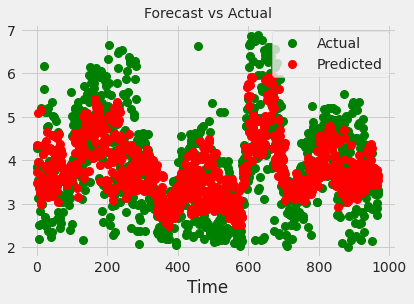

In [ ]:
plt.title("Forecast vs Actual", fontsize=14)
plt.plot(pd.Series(np.ravel(y_test)), "bo", markersize=8, label="Actual", color='green')
plt.plot(pd.Series(np.ravel(pred_GRU)), "bo", markersize=8, label="Predicted", color='red')
plt.legend(loc="higher right")
plt.xlabel("Time")

plt.show()

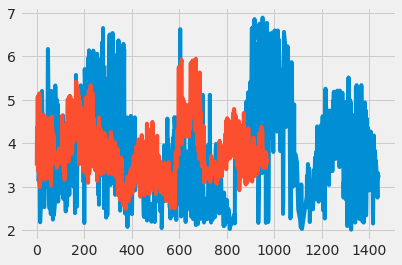

In [ ]:
trainPredict = model.predict(X_train_GRU)

plt.plot(y_test)
plt.plot(pred_GRU)
plt.show()